In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings

%matplotlib inline
%load_ext autoreload
%autoreload 2

# plt.rc('font', size=50)
# plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


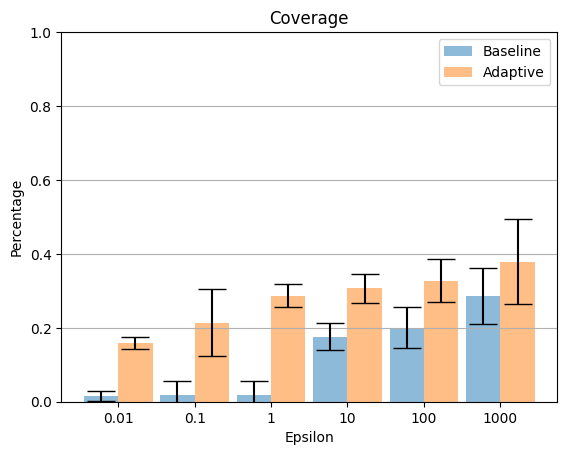

In [3]:
# Coverage Graphs
eps = [0.01, 0.1, 1, 10, 100, 1000]
covs = [0.15862069, 0.213793103, 0.286206897, 0.306896552,   0.327586207, 0.379310345]
cov_stds = [0.016893033, 0.090971765, 0.031034483, 0.039164885,   0.058213597, 0.115401383]

base_cov = [0.0165517241, 0.0172413793, 0.0175862069, 0.175862069, 0.2, 0.286206897]
base_cov_stds = [0.013793103, 0.037773969, 0.039164885, 0.036001057, 0.055172414, 0.074677268]


# Build the plot
fig, ax = plt.subplots()
x_pos = np.arange(len(covs))
width = 0.45
ax.bar(x_pos - width/2, base_cov, width, yerr=base_cov_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Baseline")
ax.bar(x_pos + width/2, covs, width, yerr=cov_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Adaptive")
ax.set_ylabel('Percentage')
ax.set_xlabel("Epsilon")
ax.set_ylim(0, 1)
ax.set_xticks(x_pos)
ax.set_xticklabels(eps)
ax.set_title('Coverage')
ax.legend()
ax.yaxis.grid(True)
plt.show()

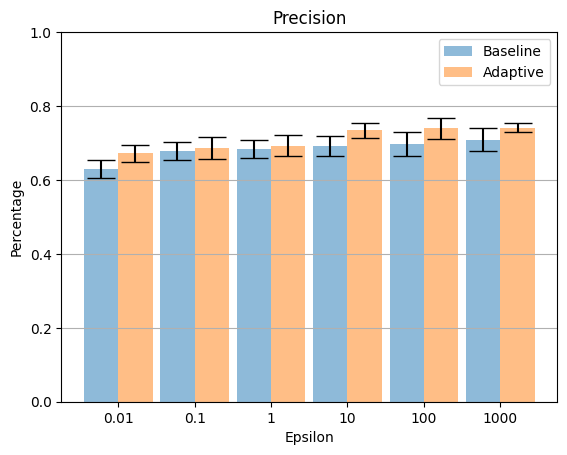

In [4]:
# Precision Graphs
base_prec = [0.630516507,0.679079386,0.682779394,0.692944407, 0.69716005, 0.709145596]
base_prec_stds = [0.023909371,0.024394823,0.024188198, 0.027066528,0.03260531, 0.031205005]

prec = [0.672485669, 0.68702724, 0.692574686, 0.734376115, 0.739805989, 0.741285464]
prec_stds = [0.022902747, 0.02938773, 0.028979768, 0.021005668, 0.027866364, 0.012734432]

# Build the plot
fig, ax = plt.subplots()
x_pos = np.arange(len(covs))
width = 0.45
ax.bar(x_pos - width/2, base_prec, width, yerr=base_prec_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Baseline")
ax.bar(x_pos + width/2, prec, width, yerr=prec_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Adaptive")
ax.set_ylabel('Percentage')
ax.set_xlabel("Epsilon")
ax.set_ylim(0, 1)
ax.set_xticks(x_pos)
ax.set_xticklabels(eps)
ax.set_title('Precision')
ax.legend()
ax.yaxis.grid(True)
plt.show()

In [ ]:
# Code to plot set of plots

fig = plt.figure(figsize=(14, 10))

grid = plt.GridSpec(2, 3, wspace = .25, hspace = .25)
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

plt.subplot(grid[0, :])
trace = egv.loc[0]
# trace1 = egv.loc[6]
# trace1 = egv.loc[8]
trace1 = egv.loc[9]
# trace2 = egv.loc[26]
# trace2 = egv.loc[28]
trace2 = egv.loc[38]
# trace3 = egv.loc[41]
# trace3 = egv.loc[43] #41 - 43 pretty good
# trace3 = egv.loc[52]
# trace3 = egv.loc[56]
# trace3 = egv.loc[58]
# trace3 = egv.loc[64]
# trace3 = egv.loc[70]
# trace3 = egv.loc[71] # high peak
trace3 = egv.loc[92]
time = range(len(trace))
plt.plot(time, trace, label='Patient 0')
plt.plot(time, trace1, label='Patient 1')
plt.plot(time, trace2, label='Patient 2')
plt.plot(time, trace3, label='Patient 3')
plt.xlabel("Time")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.legend()
plt.title("Sample Glucose Traces")

plt.subplot(grid[1, 0])
# m1 = egv.loc[71][170:210] # high peak
m1 = egv.loc[86][70:120]
time = range(len(m1))
plt.plot(time, m1, color="k")
plt.xlabel("Timesteps")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.title("Motif 0: High Peak")

plt.subplot(grid[1, 1])

m2 = egv.loc[44][110:160] # large drop
# m2 = egv.loc[63][32:72] # large drop
time = range(len(m2))
plt.plot(time, m2, color="k")
plt.xlabel("Timesteps")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.title("Motif 1: Deep Trough")

plt.subplot(grid[1, 2])
m3 = egv.loc[93][110:160] # stable in control
time = range(len(m3))
plt.plot(time, m3, color="k")
plt.xlabel("Timesteps")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.title("Motif 2: Stable Line")

fig.tight_layout()
fig.savefig("Figures/SampleTracesMotifs.png", bbox_inches='tight', dpi=300)

In [ ]:
# Query Analysis- May not need

queries = [492, 720, 842, 1104, 4615, 4791]
quers_std = [0.9, 1.135781669, 2.638181192, 0.489897949, 1.688194302, 3.346640106] 
quers_std = [x * 100 for x in quers_std]

# Build the plot
fig, ax = plt.subplots()
x_pos = np.arange(len(covs))
ax.bar(x_pos, queries, yerr=quers_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Number of Queries')
ax.set_xlabel("Epsilon")
ax.set_xticks(x_pos)
ax.set_xticklabels(eps)
ax.set_title('Query Analysis')
ax.yaxis.grid(True)
plt.show()